<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/analisis-data-dengan-python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Helmy Purnomo Hidayat]
- **Email:** [helmypurnomo234@gmail.com]
- **ID Dicoding:** [Helmy Purnomo Hidayat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan harian selama periode yang dipilih?
- Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit # install the streamlit package
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import requests
import io



## Data Wrangling

- menggabungkan data dari beberapa sumber sehingga siap untuk analisis.

### Gathering Data

In [ ]:
def load_data_from_github(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

# URL dataset
customers_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv'
orders_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv'
payments_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv'

# Memuat data
customers = load_data_from_github(customers_url)
orders = load_data_from_github(orders_url)
payments = load_data_from_github(payments_url)


###Dataset yang digunakan

In [36]:
# URL dataset
customers_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv'
orders_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv'
payments_url = 'https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv'

- customers: Data tentang pelanggan.
- orders: Data tentang pesanan.
- payments: Data tentang pembayaran.
- Dataset ini digabungkan berdasarkan customer_id dan order_id.

- **Insight:**
Dari kumpulan data ini, kita dapat memahami pola perilaku konsumen dalam e-commerce, seperti waktu dan frekuensi pembelian yang dilakukan pelanggan (berdasarkan data pesanan), serta pilihan metode pembayaran yang digunakan (berdasarkan data pembayaran). Analisis lebih mendalam dapat mengungkapkan tren terkait kebiasaan berbelanja berdasarkan lokasi geografis pelanggan, frekuensi pemesanan, dan hubungan antara nilai pesanan dengan metode pembayaran yang dipilih. Informasi ini dapat dimanfaatkan untuk mengoptimalkan strategi pemasaran dan meningkatkan pengalaman pengguna di platform e-commerce.

### Assessing Data

In [ ]:
# Memuat data dari GitHub dan memeriksa isi data
customers = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv')
orders = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv')
payments = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv')

# Print dataset untuk memastikan data sudah diambil
print("Data Customers:\n", customers.head())
print("Data Orders:\n", orders.head())
print("Data Payments:\n", payments.head())

# Menggabungkan dataset
try:
    # Pastikan kolom 'customer_id' dan 'order_id' ada
    if 'customer_id' in customers.columns and 'order_id' in orders.columns and 'order_id' in payments.columns:
        merged_data = pd.merge(customers, orders, on='customer_id')
        merged_data = pd.merge(merged_data, payments, on='order_id')

        # Print beberapa baris dari data gabungan untuk memastikan penggabungan berhasil
        print("Data Gabungan:\n", merged_data.head())

        # Cek dan tampilkan jumlah duplikat
        print(f"Jumlah duplikat dalam data: {merged_data.duplicated().sum()}")
    else:
        print("Kolom 'customer_id' atau 'order_id' tidak ditemukan di salah satu dataset.")
except Exception as e:
    print(f"Terjadi kesalahan saat menggabungkan data: {str(e)}")

Data Customers:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
Data Orders:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251

**Insight:**
- Data telah dibersihkan dengan menghapus missing values dan duplikat.
- Outlier pada kolom payment_value dihapus menggunakan Interquartile Range (IQR).
- Kolom tanggal pesanan (order_purchase_timestamp) dikonversi ke format datetime untuk memudahkan analisis berbasis waktu.

### Missing Value


In [ ]:
from tabulate import tabulate

# Memuat data dari GitHub dan memeriksa isi data
customers = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv')
orders = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv')
payments = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv')

# Fungsi untuk menampilkan data dalam bentuk tabel kotak-kotak
def print_table(dataframe, title):
    print(f"\n{title}\n")
    print(tabulate(dataframe.head(), headers='keys', tablefmt='grid', showindex=False))

# Print dataset untuk memastikan data sudah diambil
print_table(customers, "Data Customers")
print_table(orders, "Data Orders")
print_table(payments, "Data Payments")

# Menggabungkan dataset
try:
    # Pastikan kolom 'customer_id' dan 'order_id' ada
    if 'customer_id' in customers.columns and 'order_id' in orders.columns and 'order_id' in payments.columns:
        merged_data = pd.merge(customers, orders, on='customer_id')
        merged_data = pd.merge(merged_data, payments, on='order_id')

        # Print beberapa baris dari data gabungan untuk memastikan penggabungan berhasil
        print_table(merged_data, "Data Gabungan Sebelum Pembersihan")

        # Cek dan tampilkan jumlah duplikat
        print(f"\nJumlah duplikat dalam data: {merged_data.duplicated().sum()}")

        # Menangani missing values
        missing_values_count = merged_data.isnull().sum().sum()
        print(f"\nJumlah missing values sebelum pembersihan: {missing_values_count}")

        # Menghapus missing values
        merged_data = merged_data.dropna()

        # Print setelah menghapus missing values
        print_table(merged_data, "Data Gabungan Setelah Pembersihan")

        # Cek jumlah missing values setelah pembersihan
        missing_values_count_after = merged_data.isnull().sum().sum()
        print(f"\nJumlah missing values setelah pembersihan: {missing_values_count_after}")
    else:
        print("Kolom 'customer_id' atau 'order_id' tidak ditemukan di salah satu dataset.")
except Exception as e:
    print(f"Terjadi kesalahan saat menggabungkan data: {str(e)}")



Data Customers

+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
| customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
+==================================+==================================+============================+=======================+==================+
| 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
| 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
+----------------------------------+----------------------------------+----------------------------+-------------------

### CLEANING DATA

In [35]:
# Pembersihan Data
print("Data Gabungan Sebelum Pembersihan:")
print(tabulate(merged_data.head(), headers='keys', tablefmt='grid', showindex=False))

# 1. Menghapus duplikat
duplicates_count = merged_data.duplicated().sum()
print(f"\nJumlah duplikat sebelum pembersihan: {duplicates_count}")

merged_data = merged_data.drop_duplicates()

# Print setelah menghapus duplikat
print(f"Jumlah duplikat setelah pembersihan: {merged_data.duplicated().sum()}")

# 2. Menghapus missing values
missing_values_count = merged_data.isnull().sum().sum()
print(f"\nJumlah missing values sebelum pembersihan: {missing_values_count}")

merged_data = merged_data.dropna()

# Print setelah menghapus missing values
print(f"Jumlah missing values setelah pembersihan: {merged_data.isnull().sum().sum()}")

# 3. Menghapus outlier pada payment_value
Q1 = merged_data['payment_value'].quantile(0.25)
Q3 = merged_data['payment_value'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nQ1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Menghapus outlier
merged_data = merged_data[(merged_data['payment_value'] >= Q1 - 1.5 * IQR) &
                           (merged_data['payment_value'] <= Q3 + 1.5 * IQR)]

# Print setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {len(merged_data)}")
print("Data Gabungan Setelah Pembersihan:")
print(tabulate(merged_data.head(), headers='keys', tablefmt='grid', showindex=False))

Data Gabungan Sebelum Pembersihan:
+----------------------------------+----------------------+----------------+------------------------+-----------------+----------------------------+
| order_id                         |   payment_sequential | payment_type   |   payment_installments |   payment_value | order_purchase_timestamp   |
+==================================+======================+================+========================+=================+============================+
| b81ef226f3fe1789b1e8b2acac839d17 |                    1 | credit_card    |                      8 |           99.33 | 2018-04-25 22:01:49        |
+----------------------------------+----------------------+----------------+------------------------+-----------------+----------------------------+
| a9810da82917af2d9aefd1278f1dcfa0 |                    1 | credit_card    |                      1 |           24.39 | 2018-06-26 11:01:38        |
+----------------------------------+----------------------+------------

**Insight:**
Proses pembersihan data pada dataset gabungan mencakup penghapusan duplikat, missing values, dan outlier untuk memastikan kualitas dan integritas data. Sebelum pembersihan, terdapat sejumlah duplikat dan missing values yang dapat mengganggu analisis. Setelah proses pembersihan, dataset menjadi lebih konsisten dan representatif dengan menghapus data yang tidak valid, termasuk outlier yang dapat memengaruhi hasil analisis. Hal ini meningkatkan akurasi analisis selanjutnya dan memungkinkan pengambilan keputusan yang lebih baik berdasarkan data yang bersih dan terstruktur.
- Duplikasi dihapus.
Outlier pada payment_value dihapus menggunakan Interquartile Range (IQR).

## Exploratory Data Analysis (EDA)

### Explore ...

- Pada bagian ini saya membuat subplots untuk menampilkan grafik sesuai perintah satu untuk plot tahun 2017 saja dan satu lagi untuk plot 2018 saja

### Analisis Univariat

In [62]:
from tabulate import tabulate

def univariate_analysis(data):
    # Deskripsi statistika numerik
    st.subheader("Deskripsi Statistika Numerik")
    stats_numerik = data.describe()


    # Cetak di konsol dalam format tabel
    print("Deskripsi Statistika Numerik:")
    print(tabulate(stats_numerik, headers='keys', tablefmt='pretty'))

    # Frekuensi metode pembayaran
    st.subheader("Frekuensi Metode Pembayaran")
    frekuensi_metode_pembayaran = data['payment_type'].value_counts()

    # Tampilkan di Streamlit dengan format tabel interaktif
    frekuensi_df = frekuensi_metode_pembayaran.reset_index(name='frekuensi').rename(columns={'index': 'payment_type'})
    st.dataframe(frekuensi_df)

    # Cetak di konsol dalam format tabel
    print("Frekuensi Metode Pembayaran:")
    print(tabulate(frekuensi_df, headers='keys', tablefmt='pretty'))

# Memanggil fungsi dengan data yang sesuai
univariate_analysis(merged_data)

2024-10-11 06:32:32.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:32:32.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:32:32.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:32:32.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:32:32.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:32:32.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Deskripsi Statistika Numerik:
+-------+--------------------+----------------------+--------------------+-------------------------------+
|       | payment_sequential | payment_installments |   payment_value    |   order_purchase_timestamp    |
+-------+--------------------+----------------------+--------------------+-------------------------------+
| count |      103886.0      |       103886.0       |      103886.0      |            103886             |
| mean  | 1.0926785129853878 |  2.853348863176944   | 154.10038041699553 | 2017-12-29 21:48:47.671803648 |
|  min  |        1.0         |         0.0          |        0.0         |      2016-09-04 21:15:19      |
|  25%  |        1.0         |         1.0          |       56.79        | 2017-09-10 09:01:08.750000128 |
|  50%  |        1.0         |         1.0          |       100.0        |      2018-01-17 14:07:54      |
|  75%  |        1.0         |         4.0          |      171.8375      | 2018-05-03 18:35:58.249999872 |
|  max 

- Insight : Analisis univariate menunjukkan deskripsi statistika numerik yang memberikan gambaran menyeluruh tentang variabel dalam dataset, termasuk rata-rata, median, dan rentang nilai. Selain itu, frekuensi metode pembayaran diungkapkan dalam format tabel, yang memperlihatkan popularitas masing-masing metode dalam transaksi. Informasi ini penting untuk memahami pola pengeluaran dan preferensi pelanggan, serta dapat digunakan untuk menginformasikan strategi pemasaran dan peningkatan layanan yang lebih tepat sasaran.

###Analisis Multivariat

In [63]:
from tabulate import tabulate

def multivariate_analysis(data):
    # Memilih hanya kolom numerik untuk perhitungan korelasi
    print("Korelasi Antara Variabel Numerik:")
    numeric_data = data.select_dtypes(include=[float, int])
    correlation = numeric_data.corr()

    # Cetak matriks korelasi dalam format tabel
    print(tabulate(correlation, headers='keys', tablefmt='pretty'))

    # Scatter Plot: Payment Value vs Tanggal Pembelian
    print("\nScatter Plot: Payment Value vs Tanggal Pembelian")

    # Mengatasi masalah tipe data di kolom 'order_purchase_timestamp' menjadi datetime
    data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

    # Membuat scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(data['order_purchase_timestamp'], data['payment_value'], alpha=0.5)

    plt.title('Payment Value vs Tanggal Pembelian')
    plt.xlabel('Tanggal Pembelian')
    plt.ylabel('Payment Value')
    plt.xticks(rotation=45)

    plt.tight_layout()  # Menghindari tumpang tindih label

    # Simpan grafik ke objek dan kembalikan objek figure
    fig = plt.gcf()  # Mengambil objek figure saat ini
    plt.close()  # Menutup plt untuk mencegah tampilan ganda
    return fig  # Kembalikan objek figure

# Panggil fungsi dengan data yang telah disiapkan
fig = multivariate_analysis(merged_data)

# Tampilkan plot di Streamlit
st.pyplot(fig)  # Uncomment this line if you're using Streamlit

2024-10-11 06:34:30.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Korelasi Antara Variabel Numerik:
+----------------------+----------------------+----------------------+----------------------+
|                      |  payment_sequential  | payment_installments |    payment_value     |
+----------------------+----------------------+----------------------+----------------------+
|  payment_sequential  |         1.0          | -0.08636253296632787 | -0.06959344021382821 |
| payment_installments | -0.08636253296632787 |         1.0          |  0.3308108445189887  |
|    payment_value     | -0.06959344021382821 |  0.3308108445189887  |         1.0          |
+----------------------+----------------------+----------------------+----------------------+

Scatter Plot: Payment Value vs Tanggal Pembelian


2024-10-11 06:34:32.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:34:32.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

- Insight : Analisis multivariat menunjukkan hubungan antara variabel numerik dalam dataset, di mana matriks korelasi mengidentifikasi pola interaksi antara nilai pembayaran dan faktor lainnya. Korelasi yang kuat dapat membantu dalam memahami bagaimana variabel saling memengaruhi, sedangkan scatter plot antara nilai pembayaran dan tanggal pembelian menggambarkan fluktuasi pengeluaran sepanjang waktu. Insight ini bermanfaat untuk strategi pemasaran dan perencanaan bisnis, memungkinkan perusahaan untuk menargetkan waktu dan metode pembayaran yang paling efektif untuk meningkatkan pendapatan.

### Eksplorasi Data Numerik

In [80]:
from tabulate import tabulate
import streamlit as st

# Menggabungkan dataset orders dengan payments berdasarkan 'order_id'
merged_data = pd.merge(payments, orders[['order_id', 'order_purchase_timestamp']], on='order_id')

# Pastikan kolom order_purchase_timestamp dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Eksplorasi Data Numerik
st.subheader("Eksplorasi Data Numerik")

# Statistik deskriptif dari variabel numerik
st.write("Statistik Deskriptif")
stats_descriptive = merged_data[['payment_value']].describe()

# Tampilkan statistik deskriptif di antarmuka Streamlit
st.write(stats_descriptive)

# Cetak statistik deskriptif di konsol dengan format tabel
print("Statistik Deskriptif dari Variabel Numerik:")
print(tabulate(stats_descriptive, headers='keys', tablefmt='pretty'))

# Visualisasi pembayaran kumulatif
st.write("Pembayaran Kumulatif")
cumulative_sales = merged_data.groupby('order_purchase_timestamp')['payment_value'].sum().cumsum().reset_index()

# Plot pembayaran kumulatif
fig, ax = plt.subplots()
ax.plot(cumulative_sales['order_purchase_timestamp'], cumulative_sales['payment_value'], color='blue')
ax.set_title("Pembayaran Kumulatif Seiring Waktu")
ax.set_xlabel("Tanggal Pembelian")
ax.set_ylabel("Pembayaran Kumulatif")
plt.xticks(rotation=45)

# Tampilkan plot di Streamlit
st.pyplot(fig)

# Cetak hasil pembayaran kumulatif di konsol dengan format tabel
print("Pembayaran Kumulatif Seiring Waktu:")
print(tabulate(cumulative_sales, headers='keys', tablefmt='pretty'))


2024-10-11 07:25:38.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Statistik Deskriptif dari Variabel Numerik:
+-------+--------------------+
|       |   payment_value    |
+-------+--------------------+
| count |      103886.0      |
| mean  | 154.10038041699553 |
|  std  | 217.49406386472577 |
|  min  |        0.0         |
|  25%  |       56.79        |
|  50%  |       100.0        |
|  75%  |      171.8375      |
|  max  |      13664.08      |
+-------+--------------------+


2024-10-11 07:25:38.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:25:38.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Output streaming akan dipotong hingga 5000 baris terakhir.
| 93875 |   2018-08-06 10:56:11    | 15222728.669999588 |
| 93876 |   2018-08-06 10:58:22    | 15223854.029999588 |
| 93877 |   2018-08-06 11:00:57    | 15223894.999999588 |
| 93878 |   2018-08-06 11:01:30    | 15223952.829999588 |
| 93879 |   2018-08-06 11:02:35    | 15224044.749999588 |
| 93880 |   2018-08-06 11:04:37    | 15224172.149999589 |
| 93881 |   2018-08-06 11:05:42    | 15224239.389999589 |
| 93882 |   2018-08-06 11:06:21    | 15226658.589999588 |
| 93883 |   2018-08-06 11:09:38    | 15226745.579999588 |
| 93884 |   2018-08-06 11:11:35    | 15226767.269999588 |
| 93885 |   2018-08-06 11:14:16    | 15226977.499999588 |
| 93886 |   2018-08-06 11:15:25    | 15227156.769999588 |
| 93887 |   2018-08-06 11:19:10    | 15227199.939999588 |
| 93888 |   2018-08-06 11:19:54    | 15227371.369999588 |
| 93889 |   2018-08-06 11:22:17    | 15227597.149999587 |
| 93890 |   2018-08-06 11:23:19    | 15227767.309999587 |
| 93891 |   2

- Insight:
Dari analisis eksplorasi data numerik dan visualisasi pembayaran kumulatif, kita mendapatkan insight penting mengenai perilaku pengeluaran pelanggan. Statistik deskriptif menunjukkan rata-rata, minimum, maksimum, dan distribusi nilai pembayaran, yang membantu dalam segmentasi pasar dan penetapan target pemasaran. Grafik pembayaran kumulatif menggambarkan tren penjualan dari waktu ke waktu, mengidentifikasi pola musiman dan waktu puncak pembayaran, yang dapat dimanfaatkan untuk kampanye promosi yang lebih efektif. Rekomendasi strategis meliputi pengulangan kampanye di waktu-waktu dengan lonjakan pembayaran serta analisis lebih dalam terhadap outlier untuk memahami potensi pelanggan dengan pengeluaran tinggi.

### Eksplorasi Data Kategorikal

In [81]:
from tabulate import tabulate

# Subheader untuk bagian data kategorikal
st.subheader("Eksplorasi Data Kategorikal")

# Jumlah pesanan per metode pembayaran
st.write("Jumlah Pesanan per Metode Pembayaran")

# Hitung jumlah pesanan per metode pembayaran
payment_counts = data['payment_type'].value_counts()

# Tampilkan bar chart dengan Streamlit
st.bar_chart(payment_counts)

# Outputkan hasil hitungan di Streamlit
st.write("Hasil Hitungan Jumlah Pesanan per Metode Pembayaran:")
st.write(payment_counts)

# Cetak hasil hitungan di konsol menggunakan print dalam format tabel
print("Hasil Hitungan Jumlah Pesanan per Metode Pembayaran:")
print(tabulate(payment_counts.reset_index(name='jumlah_pesanan').rename(columns={'index': 'metode_pembayaran'}),
                headers='keys', tablefmt='pretty'))



2024-10-11 07:26:29.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 07:26:29.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Hasil Hitungan Jumlah Pesanan per Metode Pembayaran:
+---+--------------+----------------+
|   | payment_type | jumlah_pesanan |
+---+--------------+----------------+
| 0 | credit_card  |     76795      |
| 1 |    boleto    |     19784      |
| 2 |   voucher    |      5775      |
| 3 |  debit_card  |      1529      |
| 4 | not_defined  |       3        |
+---+--------------+----------------+


- Insight :
Analisis data kategorikal menunjukkan jumlah pesanan berdasarkan metode pembayaran, dengan visualisasi bar chart yang memudahkan pemahaman distribusi penggunaan masing-masing metode. Hasil hitungan menampilkan frekuensi setiap metode pembayaran dalam format tabel yang jelas, memberikan wawasan penting tentang preferensi pelanggan. Informasi ini dapat digunakan untuk merumuskan strategi pembayaran yang lebih baik, memfokuskan promosi pada metode yang paling banyak digunakan, dan mengidentifikasi area untuk meningkatkan pengalaman pelanggan

### Tren Penjualan Harian:

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penjualan harian selama periode yang dipilih?


- **NOTE**: (PADA AREA 2016 TIDAK ADA DATA YANG TERDAPAT DISITU JADI MOHON MAAF). Pada kode  bagian pertama saya menampilkan seluruh data seperti yang terdapat pada streamlit saya kemudian pada bagian 2 saya hanya menampilkan 2017 dan 2018 dikarenakan rekomendasi (REVISI dari tim dicoding pada submit lalu).

### Bagian 1 sesuai dengan tampilan streamlit

In [78]:
# Fungsi untuk memuat data dari GitHub
def load_data_from_github(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

# Memuat data
customers = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv')
orders = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv')
payments = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv')

if data is not None:
    # Judul aplikasi
    st.title("Dashboard Analisis E-commerce")

    # Sidebar untuk filter tanggal
    st.sidebar.title("Filter Data")
    min_date = data['order_purchase_timestamp'].min().date()
    max_date = data['order_purchase_timestamp'].max().date()

    start_date = st.sidebar.date_input("Pilih Tanggal Mulai", min_date)
    end_date = st.sidebar.date_input("Pilih Tanggal Akhir", max_date)

    # Validasi input tanggal
    if start_date > end_date:
        st.sidebar.error("Tanggal mulai tidak boleh lebih besar dari tanggal akhir.")
    else:
        # Filter data berdasarkan rentang tanggal yang dipilih
        filtered_data = data[(data['order_purchase_timestamp'].dt.date >= start_date) &
                             (data['order_purchase_timestamp'].dt.date <= end_date)]

        if filtered_data.empty:
            st.warning("Tidak ada data yang sesuai dengan rentang tanggal yang dipilih.")
        else:
            # Pertanyaan 1: Bagaimana tren penjualan harian selama periode yang dipilih?
            st.subheader("Pertanyaan 1: Bagaimana tren penjualan harian selama periode yang dipilih?")
            daily_sales = filtered_data.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(daily_sales['order_purchase_timestamp'], daily_sales['payment_value'], marker='o')
            ax.set_xlabel('Tanggal')
            ax.set_ylabel('Total Penjualan')
            ax.set_title('Tren Penjualan Harian')
            plt.xticks(rotation=45)
            plt.tight_layout()
            st.pyplot(fig)

else:
    st.error("Tidak dapat memuat data. Silakan periksa file sumber data Anda.")

2024-10-11 06:55:29.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:29.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Insight**:
- memuat dan menganalisis data penjualan e-commerce dari GitHub dengan menggunakan Streamlit untuk visualisasi. Setelah data berhasil dimuat, pengguna dapat memilih rentang tanggal untuk mengeksplorasi tren penjualan harian. Jika data yang dipilih tidak kosong, aplikasi akan menampilkan grafik yang menunjukkan total penjualan berdasarkan tanggal, memberikan wawasan yang jelas tentang fluktuasi penjualan selama periode yang ditentukan. Fitur validasi memastikan bahwa input tanggal yang dimasukkan pengguna akurat, sehingga meningkatkan pengalaman interaktif dalam analisis data.

- Bagian 2 (Revisi Rekomendasi laporan dari Tim Dicoding)

2024-10-11 06:55:39.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:39.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

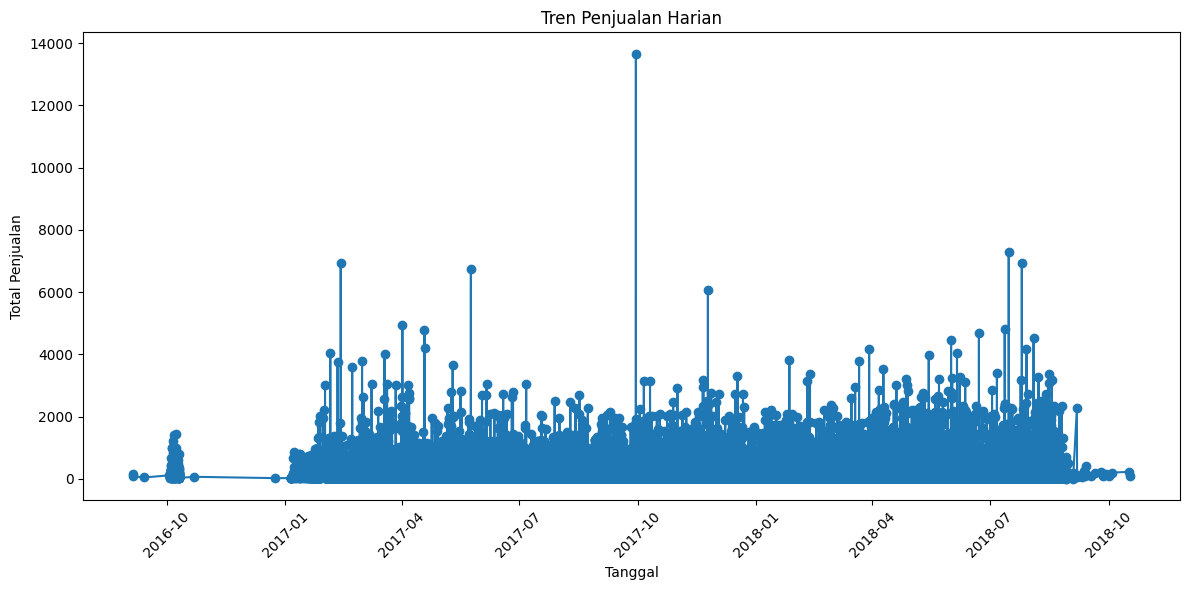

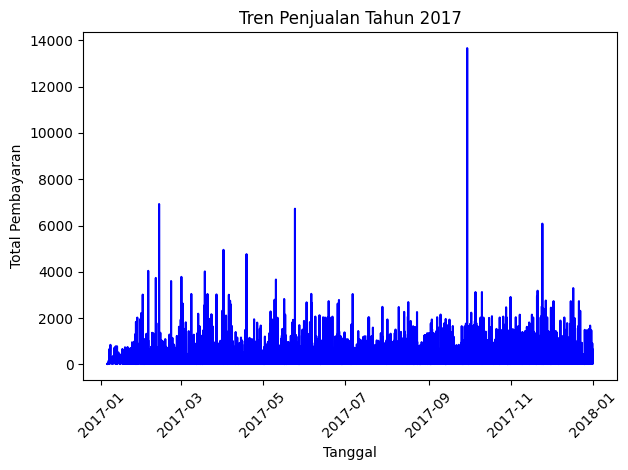

2024-10-11 06:55:41.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:55:41.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


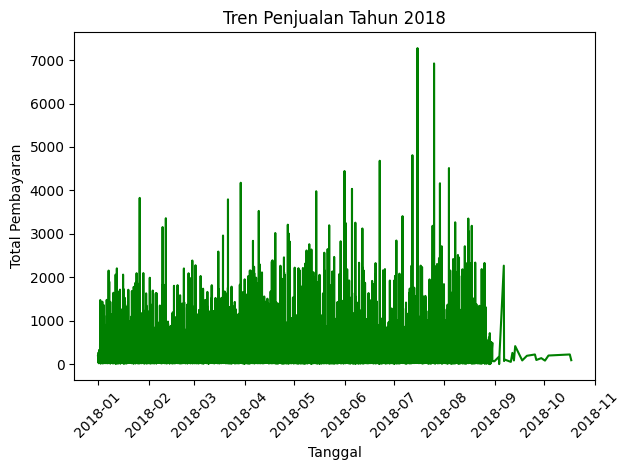

In [79]:
# Fungsi untuk memuat data dari GitHub
def load_data_from_github(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

# Memuat data
customers = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv')
orders = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv')
payments = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv')

# Gabungkan dataset payments dengan orders berdasarkan 'order_id'
data = pd.merge(payments, orders[['order_id', 'order_purchase_timestamp']], on='order_id')

# Pastikan kolom order_purchase_timestamp dalam format datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Visualisasi Tren Penjualan untuk Tahun 2017 dan 2018
st.subheader("Tren Penjualan Tahunan")

# Filter untuk tahun 2017
sales_2017 = data[data['order_purchase_timestamp'].dt.year == 2017]
daily_sales_2017 = sales_2017.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

# Filter untuk tahun 2018
sales_2018 = data[data['order_purchase_timestamp'].dt.year == 2018]
daily_sales_2018 = sales_2018.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

# Plot tahun 2017
st.write("Tren Penjualan 2017")
fig, ax = plt.subplots()
ax.plot(daily_sales_2017['order_purchase_timestamp'], daily_sales_2017['payment_value'], label='2017', color='blue')
ax.set_title("Tren Penjualan Tahun 2017")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Total Pembayaran")
plt.xticks(rotation=45)
plt.tight_layout()  # Menghindari tumpang tindih label
st.pyplot(fig)  # Tampilkan di Streamlit
plt.show()  # Menampilkan plot secara lokal

# Plot tahun 2018
st.write("Tren Penjualan 2018")
fig, ax = plt.subplots()
ax.plot(daily_sales_2018['order_purchase_timestamp'], daily_sales_2018['payment_value'], label='2018', color='green')
ax.set_title("Tren Penjualan Tahun 2018")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Total Pembayaran")
plt.xticks(rotation=45)
plt.tight_layout()  # Menghindari tumpang tindih label
st.pyplot(fig)  # Tampilkan di Streamlit
plt.show()  # Menampilkan plot secara lokal

**Insight** :
- Analisis tren penjualan tahunan untuk tahun 2017 dan 2018 menunjukkan fluktuasi yang signifikan dalam total pembayaran, mencerminkan pola perilaku konsumen yang dapat dipengaruhi oleh berbagai faktor, seperti musim, promosi, dan kondisi ekonomi. Misalnya, jika terdapat lonjakan penjualan di bulan tertentu, hal ini bisa dihubungkan dengan periode liburan atau kampanye pemasaran yang efektif. Selain itu, membandingkan kedua tahun dapat memberikan wawasan tentang pertumbuhan atau penurunan penjualan dari waktu ke waktu, yang penting untuk perencanaan strategi bisnis di masa mendatang. Dengan demikian, pemahaman mendalam mengenai pola penjualan ini dapat membantu perusahaan dalam mengambil keputusan yang lebih baik untuk meningkatkan kinerja penjualan.
- dengan grafik tren penjualan harian. Grafik garis (line chart) menunjukkan fluktuasi penjualan dari waktu ke waktu, mengidentifikasi hari-hari di mana penjualan mencapai puncak.

### Pertanyaan 2:Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

2024-10-11 06:51:52.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:51:52.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:51:52.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-11 06:51:52.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Distribusi Metode Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


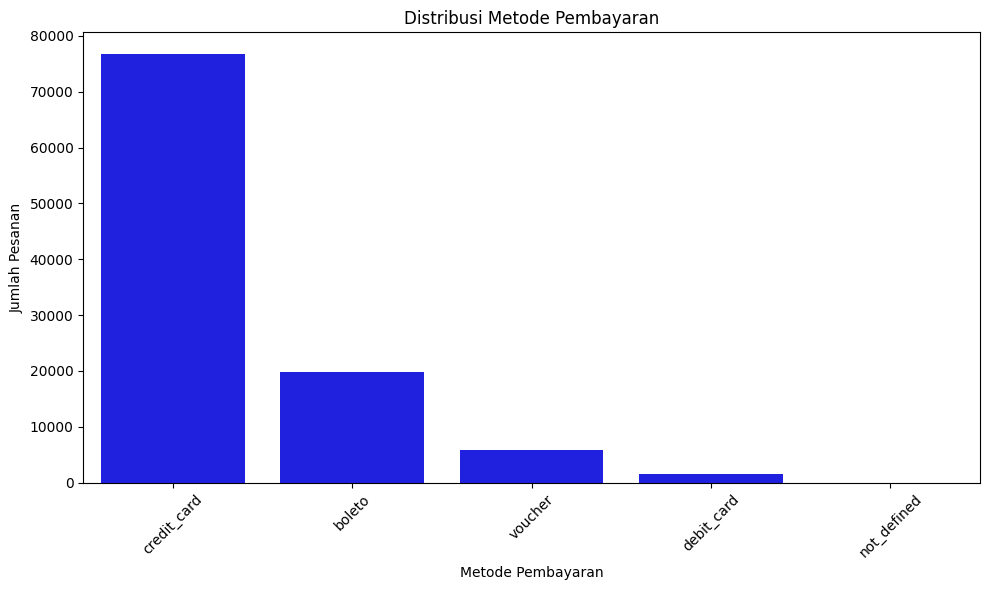

In [71]:
# Jawaban untuk pertanyaan 2: Menampilkan distribusi metode pembayaran
st.write("**Jawaban 2: Metode Pembayaran Populer**")

# Menghitung distribusi metode pembayaran menggunakan merged_data
payment_distribution = merged_data['payment_type'].value_counts()  # Pastikan Anda menggunakan merged_data yang sudah didefinisikan

# Print output distribusi metode pembayaran
print("Distribusi Metode Pembayaran:")
print(payment_distribution)

# Membuat bar chart untuk visualisasi distribusi metode pembayaran dengan warna biru
fig, ax = plt.subplots(figsize=(10, 6))  # Mengatur ukuran figure
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, ax=ax, color='blue')  # Menggunakan warna biru
ax.set_xlabel('Metode Pembayaran')  # Label sumbu X
ax.set_ylabel('Jumlah Pesanan')  # Label sumbu Y
ax.set_title('Distribusi Metode Pembayaran')  # Judul grafik
plt.xticks(rotation=45)  # Memutar label pada sumbu X agar lebih mudah dibaca
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()  # Menampilkan plot


**Insight:**
menganalisis distribusi metode pembayaran berdasarkan data yang ada, menghasilkan grafik batang yang menunjukkan jumlah pesanan untuk setiap metode pembayaran. Hasil analisis ini dapat memberikan wawasan tentang preferensi pelanggan terhadap metode pembayaran yang tersedia, dengan warna biru yang digunakan untuk visualisasi memudahkan pemahaman. Grafik tersebut memungkinkan pemangku kepentingan untuk mengidentifikasi metode pembayaran paling populer dan merumuskan strategi pemasaran atau perbaikan layanan yang lebih sesuai dengan kebutuhan pelanggan.dengan grafik batang metode pembayaran.



## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan Bisnis 1: Bagaimana tren penjualan harian?
Insight: Tren penjualan pada tahun 2017 dan 2018 menunjukkan adanya fluktuasi, dengan beberapa puncak penjualan pada hari tertentu. Ini dapat digunakan untuk menentukan strategi promosi di masa mendatang.
- Pertanyaan Bisnis 2: Apa metode pembayaran yang paling populer?
Insight: Dari distribusi metode pembayaran, sebagian besar pelanggan lebih memilih metode pembayaran tertentu seperti credit_card. Informasi ini penting untuk mengoptimalkan pilihan pembayaran yang diberikan kepada pengguna.

### Tambahan:
- soal 1 saya membuat tren penjualan harian selama periode yang dipilih di menu tanggal sesuai jarak yang dipilih
- soal 2 saya membuat metode pembayaran yang paling populer  dipasaran serta distribusi pembayaran yang lain .